In [25]:
from collections import defaultdict
import os
import csv

csv_dir = "../log/droid/vectors-dinov2/64-32-Uni_8_16-10-1K/dtw"
# csv_dir = "../log/ms-marco/vectors-colbert/k10_s1K_v137K/dtw"
data_dict = defaultdict(list)

for csv_name in os.listdir(csv_dir):
    if not csv_name.endswith(".csv"):
        continue

    algm, _, time = csv_name[:-4].partition("-search-")

    filepath = os.path.join(csv_dir, csv_name)
    with open(filepath, newline="", encoding="utf-8") as f:
        reader = csv.reader(f)
        next(reader, None)
        records = [tuple(map(int, row)) for row in reader]

    data_dict[algm].append((time, records))

for algm in data_dict:
    data_dict[algm].sort(key=lambda x: x[0], reverse=True)

data_dict

defaultdict(list,
            {'sequence': [('251103-181255',
               [(10, 4084, 146, 1000, 100, 9537, 23501),
                (20, 6809, 233, 1000, 100, 20601, 40258),
                (50, 15161, 434, 1000, 100, 54002, 87585),
                (100, 29138, 650, 1000, 100, 108366, 161254),
                (200, 55683, 829, 1000, 100, 218453, 301973),
                (500, 127356, 938, 1000, 100, 551914, 703303),
                (1000, 239629, 979, 1000, 100, 1110197, 1342622),
                (2000, 455789, 997, 1000, 100, 2233639, 2582034)])],
             'brute_force': [('251029-155236',
               [(0, 540483, 1000, 1000, 100)])],
             'seq': [('251104-122406',
               [(10,
                 3685,
                 75,
                 1000,
                 100,
                 4945,
                 20047,
                 6386,
                 30500,
                 2501,
                 1129),
                (20,
                 6265,
            

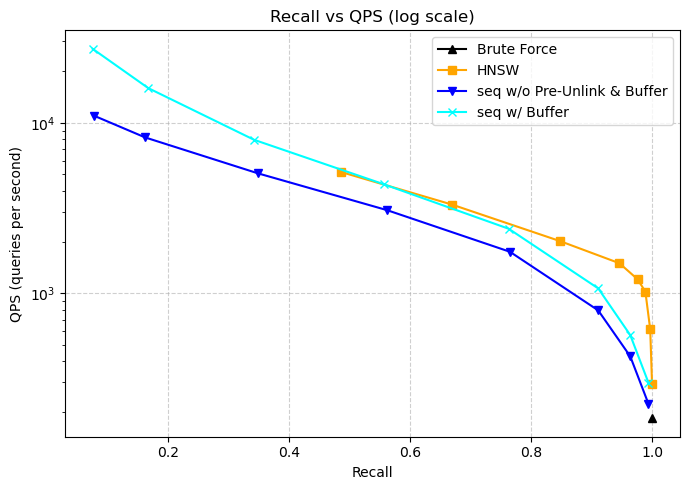

In [26]:
import matplotlib.pyplot as plt


plot_styles = {
    "brute_force": {"color": "black", "marker": "^", "label": "Brute Force"},
    "hnsw": {"color": "orange", "marker": "s", "label": "HNSW"},
    "ivfpq": {"color": "red", "marker": "D", "label": "IVFPQ"},
    "seq": [
        {"color": "blue", "marker": "v", "label": "seq w/o Pre-Unlink & Buffer", "time": "251104-104159"},
        {"color": "cyan", "marker": "x", "label": "seq w/ Buffer"},
        # {"color": "brown", "marker": "*", "label": "SOS w/ Buffer"},
    ],
    # "sequence": {"color": "green", "marker": "o", "label": "Sequence"},
    # "my_hnsw": {"color": "magenta", "marker": ">", "label": "My HNSW"},
}


def get_records(algm, index):
    if algm not in data_dict:
        return None
    if isinstance(index, int):
        return data_dict[algm][index][1]
    elif isinstance(index, str):
        for time, records in data_dict[algm]:
            if time == index:
                return records


def extract_xy(records):
    recall = [r[2] / r[3] for r in records]
    qps = [r[4] / (r[1] / 1e6) for r in records]
    return recall, qps


plt.figure(figsize=(7, 5))

for algm, styles in plot_styles.items():
    if not isinstance(styles, list):
        styles = [styles]
    for style in styles:
        records = get_records(algm, style.get("time", 0))
        if records is None:
            continue
        recall, qps = extract_xy(records)
        plt.plot(recall, qps, marker=style["marker"], color=style["color"], label=style["label"], linewidth=1.5)

plt.xlabel("Recall")
plt.ylabel("QPS (queries per second)")
plt.yscale("log")
plt.title("Recall vs QPS (log scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt

plot_styles = {
    "dtw": {"color": "blue", "marker": "o", "label": "DTW"},
    "my_hnsw": {"color": "red", "marker": "s", "label": "My HNSW"},
}


def extract_metrics(records):
    ef_values = [r[0] for r in records]
    hops = [r[5] / r[4] for r in records]
    dists = [r[6] / r[4] for r in records]
    return ef_values, hops, dists


fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()

for algm, style in plot_styles.items():
    records = data_dict[algm + "_search"]
    ef, hops, dists = extract_metrics(records)

    x = range(len(ef))
    ax1.plot(x, hops, marker=style["marker"], color=style["color"], linestyle="-", label=f"{style['label']}")
    ax2.plot(x, dists, marker=style["marker"], color=style["color"], linestyle="--", label=f"{style['label']}")

ax1.set_xlabel("ef")
ax1.set_ylabel("Avg Hops")
ax1.set_yscale("log")
ax2.set_ylabel("Avg DistComps")
ax2.set_yscale("log")

ax1.legend(loc="upper left", fontsize=9)

ax1.grid(True, linestyle="--", alpha=0.5)
plt.title("Comparison of Hops and Distance Computations vs ef")
plt.tight_layout()
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x7f94ad81a160> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 700x500 with 2 Axes>